Suppose, naively, we are unsure about the probability of heads in a coin flip (spoiler alert: it's 50%). We believe there is some true underlying ratio, call it `p`, but have no prior opinion on what `p` might be.

We begin to flip a coin, and record the observations: either `H` or `T`. This is our observed data. An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data.

Below we plot a sequence of updating posterior probabilities as we observe increasing amounts of data (coin flips).

In [1]:
import matplotlib
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
figsize(11, 9)

%matplotlib inline

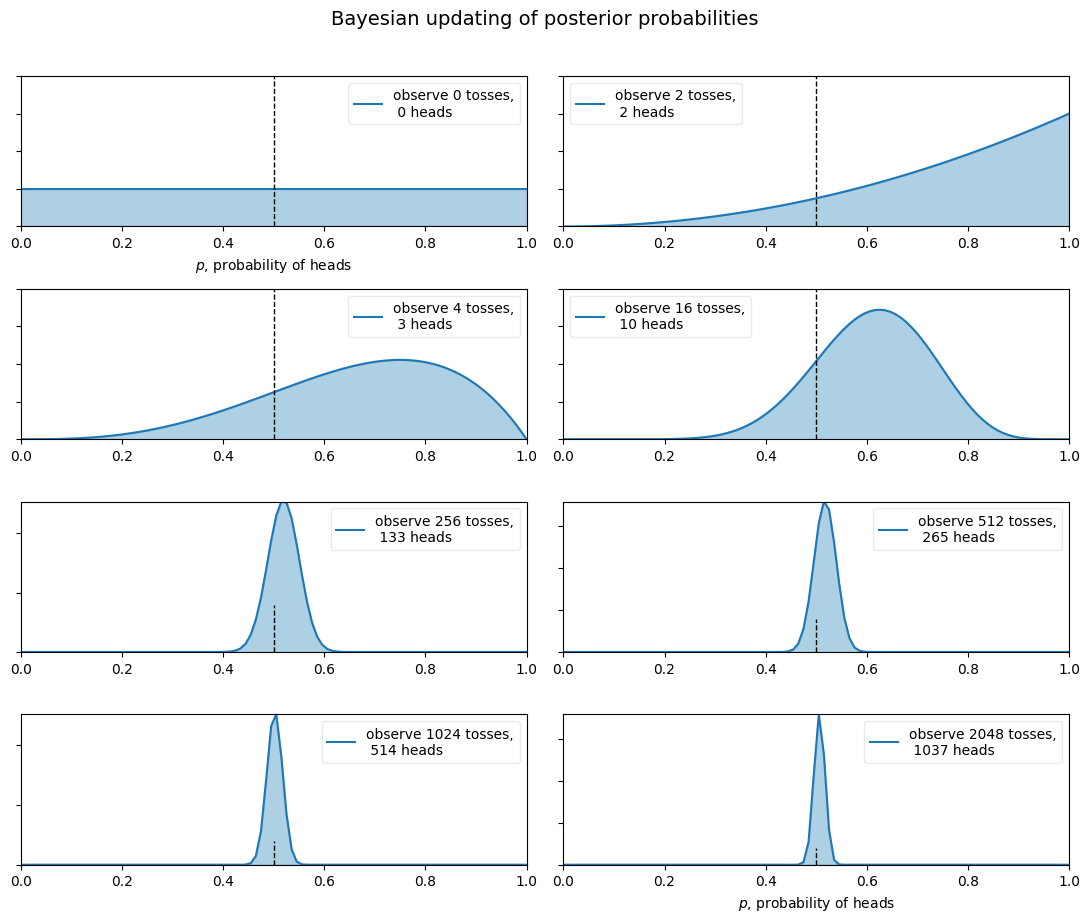

In [5]:
# Set the Beta distribution as the distribution of interest
dist = stats.beta

# Number of trials (coin flips) to simulate
n_trials = [0, 2, 4, 16, 256, 512, 1024, 2048]

# Generate random data for coin flips (0.5 probability for heads)
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

# Create an array of values from 0 to 1 (100 values in total)
x = np.linspace(0, 1, 100)

# Loop through the different numbers of trials
for k, N in enumerate(n_trials):
    # Create a subplot with the appropriate number of rows and columns
    sx = plt.subplot(len(n_trials) // 2, 2, k + 1)
    
    # Set the x-axis label for the first and last subplot
    if k in [0, len(n_trials) - 1]:
        plt.xlabel("$p$, probability of heads")
    
    # Hide the y-axis labels
    plt.setp(sx.get_yticklabels(), visible=False)
    
    # Calculate the number of heads observed in the first N coin flips
    heads = data[:N].sum()
    
    # Calculate the posterior distribution (Beta distribution) with the observed data
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    
    # Plot the posterior distribution
    plt.plot(x, y, label=f"observe {N} tosses,\n {heads} heads")
    
    # Fill the area under the curve
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    
    # Draw a vertical line at p = 0.5
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    # Add a legend to the plot
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    
    # Adjust the plot to fit within the subplot
    plt.autoscale(tight=True)

# Set the main title for the figure
plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
